In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../DATA/mouse_viral_study.csv')

In [4]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


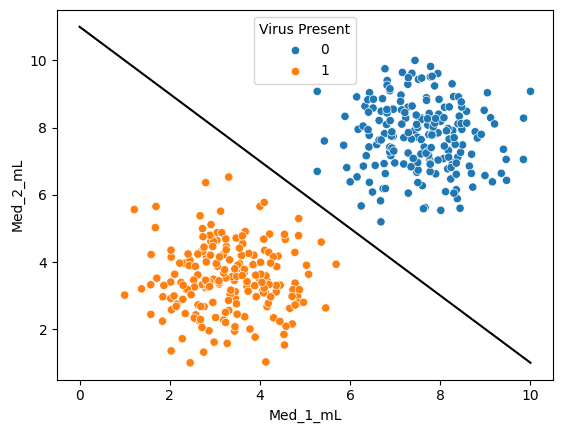

In [10]:
sns.scatterplot(x='Med_1_mL', y='Med_2_mL',hue='Virus Present', data = df)
x = np.linspace(0, 10, 100)
y = (-1)*x + 11
plt.plot(x, y, 'black')

In [12]:
from sklearn.svm import SVC

In [13]:
model = SVC(kernel='linear', C= 1000)
X = df.drop('Virus Present', axis=1)
y= df['Virus Present']
model.fit(X, y)

SVC(C=1000, kernel='linear')

In [14]:
from svm_margin_plot import plot_svm_boundary

C:\Users\vinod.baste\AppData\Local\miniconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


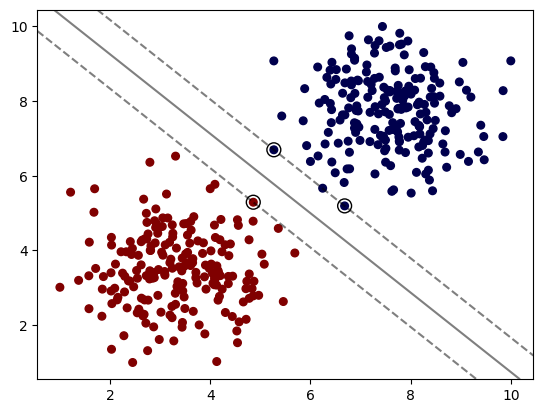

In [15]:
plot_svm_boundary(model, X, y)

C:\Users\vinod.baste\AppData\Local\miniconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


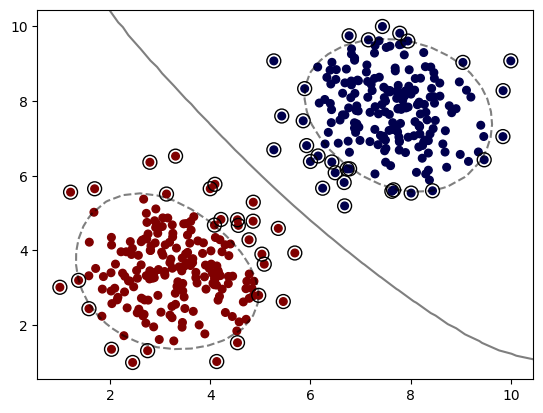

In [21]:
model = SVC(kernel = 'rbf', C=0.1, gamma=0.1)
model.fit(X, y)
plot_svm_boundary(model, X, y)

C:\Users\vinod.baste\AppData\Local\miniconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


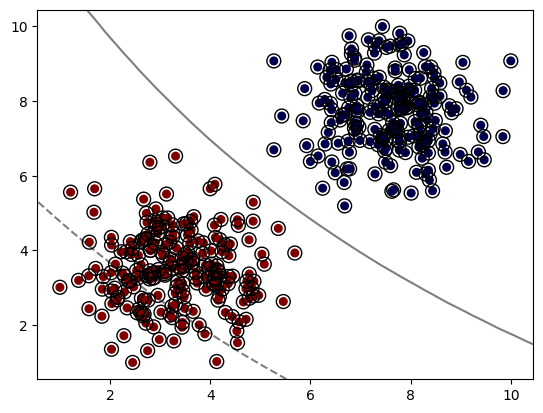

In [22]:
model = SVC(kernel = 'sigmoid', C=0.1, gamma=0.1)
model.fit(X, y)
plot_svm_boundary(model, X, y)

C:\Users\vinod.baste\AppData\Local\miniconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


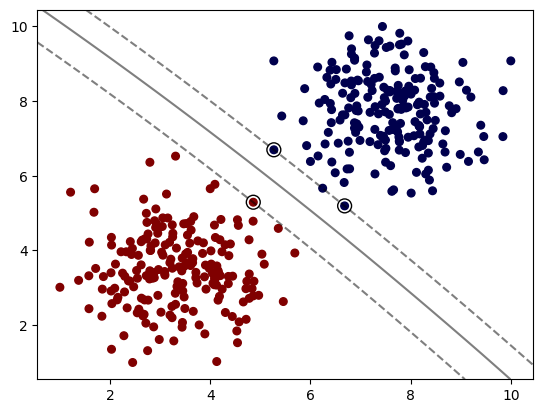

In [24]:
model = SVC(kernel = 'poly', degree=3, C=0.1, gamma=0.1)
model.fit(X, y)
plot_svm_boundary(model, X, y)

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [35]:
model = SVC()
operation = [('model', model)]
pipe = Pipeline(operation)
param_grid = {'model__kernel':['rbf', 'linear', 'sigmoid'], 'model__C': [0.01, 0.1, 1], 'model__gamma':[0.01, 0.1, 1]}
gvc = GridSearchCV(pipe, param_grid, verbose=2)
gvc.fit(X, y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END model__C=0.01, model__gamma=0.01, model__kernel=rbf; total time=   0.0s
[CV] END model__C=0.01, model__gamma=0.01, model__kernel=rbf; total time=   0.0s
[CV] END model__C=0.01, model__gamma=0.01, model__kernel=rbf; total time=   0.0s
[CV] END model__C=0.01, model__gamma=0.01, model__kernel=rbf; total time=   0.0s
[CV] END model__C=0.01, model__gamma=0.01, model__kernel=rbf; total time=   0.0s
[CV] END model__C=0.01, model__gamma=0.01, model__kernel=linear; total time=   0.0s
[CV] END model__C=0.01, model__gamma=0.01, model__kernel=linear; total time=   0.0s
[CV] END model__C=0.01, model__gamma=0.01, model__kernel=linear; total time=   0.0s
[CV] END model__C=0.01, model__gamma=0.01, model__kernel=linear; total time=   0.0s
[CV] END model__C=0.01, model__gamma=0.01, model__kernel=linear; total time=   0.0s
[CV] END model__C=0.01, model__gamma=0.01, model__kernel=sigmoid; total time=   0.0s
[CV] END model__C=0.01, mode

GridSearchCV(estimator=Pipeline(steps=[('model', SVC())]),
             param_grid={'model__C': [0.01, 0.1, 1],
                         'model__gamma': [0.01, 0.1, 1],
                         'model__kernel': ['rbf', 'linear', 'sigmoid']},
             verbose=2)

In [36]:
gvc.best_params_

{'model__C': 0.01, 'model__gamma': 0.01, 'model__kernel': 'rbf'}

In [38]:
df = pd.read_csv('../DATA/cement_slump.csv')

In [39]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


<Axes: >

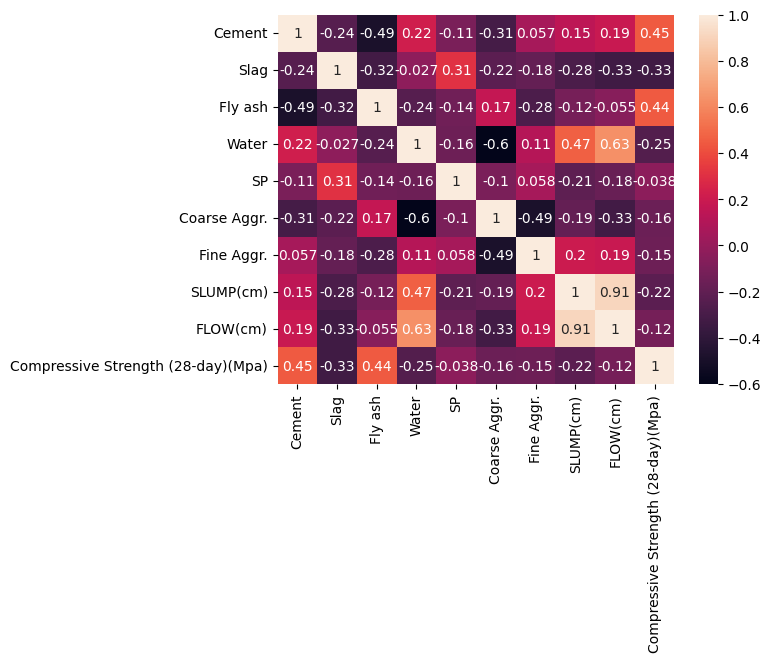

In [40]:
sns.heatmap(df.corr(), annot=True)

In [42]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [43]:
X = df.drop('Compressive Strength (28-day)(Mpa)', axis=1)
y = df['Compressive Strength (28-day)(Mpa)']

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR, LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
model = SVR()
scalar = StandardScaler()
operations = [ ('scalar', scalar), ('model', model)]
pipe= Pipeline(operations)
param_grid = {'model__kernel':['linear', 'rbf', 'poly', 'sigmoid'], 'model__degree':[1, 2,3 ,4], 'model__C':[0.001, 0.01, 0.1, 1],'model__epsilon':[0.001, 0.01, 0.1, 1]}
grid_search = GridSearchCV(pipe, param_grid, verbose=1, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'], refit='neg_mean_squared_error')

In [57]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


GridSearchCV(estimator=Pipeline(steps=[('scalar', StandardScaler()),
                                       ('model', SVR())]),
             param_grid={'model__C': [0.001, 0.01, 0.1, 1],
                         'model__degree': [1, 2, 3, 4],
                         'model__epsilon': [0.001, 0.01, 0.1, 1],
                         'model__kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             refit='neg_mean_squared_error',
             scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'],
             verbose=1)

In [58]:
grid_search.predict(X_test)

array([18.76867377, 37.35293249, 32.93687065, 31.01872142, 46.64661094,
       38.77240551, 34.27263472, 39.7104471 , 37.67269715, 50.37317782,
       34.93442724, 30.70258809, 29.32856508, 35.6366384 , 44.53344176,
       47.31016891, 45.90095231, 36.16672612, 30.17419453, 33.60626395,
       42.04800982, 36.41058372, 34.10648129, 31.03995711, 49.98287971,
       38.64898957, 31.2417712 , 29.36420213, 36.97318866, 32.33150263,
       32.04014231])

In [60]:
grid_search.best_params_

{'model__C': 1,
 'model__degree': 1,
 'model__epsilon': 1,
 'model__kernel': 'linear'}

In [64]:
grid_search.best_score_

-8.099487299087432

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [67]:
mean_absolute_error(y_test, grid_search.predict(X_test))

2.8121291785004545

In [69]:
np.sqrt(mean_squared_error(y_test, grid_search.predict(X_test)))

3.4896520149992645

In [71]:
y_test.mean()

36.26870967741935